## Task 3_2_2(fill the missing data with KNN)

In [1]:
import pandas as pd
import numpy as np
all_data=pd.read_csv('PRSA_data.csv')

In [2]:
#Four dummy variables are introduced to deal with 'cbwd'
all_data['cvornot']=all_data['cbwd']=='cv'
for i in range(len(all_data)):
    if all_data['cvornot'][i]==True:
        all_data['cvornot'][i]=1
    else:
        all_data['cvornot'][i]=0

all_data['NEornot']=all_data['cbwd']=='NE'
for i in range(len(all_data)):
    if all_data['NEornot'][i]==True:
        all_data['NEornot'][i]=1
    else:
        all_data['NEornot'][i]=0

all_data['NWornot']=all_data['cbwd']=='NW'
for i in range(len(all_data)):
    if all_data['NWornot'][i]==True:
        all_data['NWornot'][i]=1
    else:
        all_data['NWornot'][i]=0

all_data['SEornot']=all_data['cbwd']=='SE'
for i in range(len(all_data)):
    if all_data['SEornot'][i]==True:
        all_data['SEornot'][i]=1
    else:
        all_data['SEornot'][i]=0

C:\Users\86180\AppData\Local\Temp/ipykernel_9984/3183737851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cvornot'][i]=0
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\86180\AppData\Local\Temp/ipykernel_9984/3183737851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['NEornot'][i

In [3]:
all_data['nightornot']=all_data['hour']<6 #treat 0 1 2 3 4 5 as night
for i in range(len(all_data)):
    if all_data['nightornot'][i]==True:
        all_data['nightornot'][i]=1
    else:
        all_data['nightornot'][i]=0

all_data['morningornot']=(all_data['hour']>5)&(all_data['hour']<12)  #treat 6 7 8 9 10 11 as morning
for i in range(len(all_data)):
    if all_data['morningornot'][i]==True:
        all_data['morningornot'][i]=1
    else:
        all_data['morningornot'][i]=0

all_data['afternoonornot']=(all_data['hour']>11)&(all_data['hour']<18)  #treat 12 13 14 15 16 17 as afternoon 
for i in range(len(all_data)):
    if all_data['afternoonornot'][i]==True:
        all_data['afternoonornot'][i]=1
    else:
        all_data['afternoonornot'][i]=0

all_data['eveningornot']=(all_data['hour']>17)  #treat 18 19 20 21 22 23 24 as evening
for i in range(len(all_data)):
    if all_data['eveningornot'][i]==True:
        all_data['eveningornot'][i]=1
    else:
        all_data['eveningornot'][i]=0

C:\Users\86180\AppData\Local\Temp/ipykernel_9984/397320567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['nightornot'][i]=1
C:\Users\86180\AppData\Local\Temp/ipykernel_9984/397320567.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['morningornot'][i]=0
C:\Users\86180\AppData\Local\Temp/ipykernel_9984/397320567.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['afternoonornot'][i]=0
C:\Users\86180

In [4]:
from datetime import date
all_data['weekdaysornot']=all_data['hour']<6
for i in range(len(all_data)):
    a=all_data['year'][i]
    b=all_data['month'][i]
    c=all_data['day'][i]
    if (date(a,b,c).weekday()==0) or (date(a,b,c).weekday()==1) or (date(a,b,c).weekday()==2) or (date(a,b,c).weekday()==3) or (date(a,b,c).weekday()==4):
        all_data['weekdaysornot'][i]=1
    else:
        all_data['weekdaysornot'][i]=0
#节假日也归为weekends
for i in range(len(all_data)):
    if (all_data['month'][i]==5)and(all_data['day'][i]==1 or all_data['day'][i]==2 or all_data['day'][i]==3):
        all_data['weekdaysornot'][i]=0
    if (all_data['month'][i]==10)and(all_data['day'][i]==1 or all_data['day'][i]==2 or all_data['day'][i]==3 or all_data['day'][i]==4 or all_data['day'][i]==5 or all_data['day'][i]==6 or all_data['day'][i]==7):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2010)and(all_data['month'][i]==1)and(all_data['day'][i]>7)and(all_data['day'][i]<20):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2011)and(all_data['month'][i]==1)and(all_data['day'][i]>28)and(all_data['day'][i]<31):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2011)and(all_data['month'][i]==2)and(all_data['day'][i]>0)and(all_data['day'][i]<9):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2012)and(all_data['month'][i]==1)and(all_data['day'][i]>18)and(all_data['day'][i]<29):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2013)and(all_data['month'][i]==2)and(all_data['day'][i]>5)and(all_data['day'][i]<16):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2014)and(all_data['month'][i]==1)and(all_data['day'][i]>25)and(all_data['day'][i]<31):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2014)and(all_data['month'][i]==2)and(all_data['day'][i]>0)and(all_data['day'][i]<6):
        all_data['weekdaysornot'][i]=0

C:\Users\86180\AppData\Local\Temp/ipykernel_9984/533460794.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['weekdaysornot'][i]=1


In [5]:
all_data['before_police_or_not']=all_data['year']<2014  #考虑政策影响
for i in range(len(all_data)):
    if all_data['before_police_or_not'][i]==True:
        all_data['before_police_or_not'][i]=1
    else:
        all_data['before_police_or_not'][i]=0

C:\Users\86180\AppData\Local\Temp/ipykernel_9984/2693529844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['before_police_or_not'][i]=1


In [6]:
#考虑季节和供暖期，月份划分为这几个种类：4-5（春）  6-9（夏） 10（秋，但农民收获季） 11（秋，供暖） 12-3（冬，供暖）
all_data['month_class_one_or_not']=all_data['month']==0
for i in range(len(all_data)):
    if (all_data['month'][i]>3)&(all_data['month'][i]<6):
        all_data['month_class_one_or_not'][i]=1
    else:
        all_data['month_class_one_or_not'][i]=0

all_data['month_class_two_or_not']=all_data['month']==0
for i in range(len(all_data)):
    if (all_data['month'][i]>5)&(all_data['month'][i]<10):
        all_data['month_class_two_or_not'][i]=1
    else:
        all_data['month_class_two_or_not'][i]=0

all_data['month_class_three_or_not']=all_data['month']==10
for i in range(len(all_data)):
    if all_data['month_class_three_or_not'][i]==True:
        all_data['month_class_three_or_not'][i]=1
    else:
        all_data['month_class_three_or_not'][i]=0

all_data['month_class_four_or_not']=all_data['month']==11
for i in range(len(all_data)):
    if all_data['month_class_four_or_not'][i]==True:
        all_data['month_class_four_or_not'][i]=1
    else:
        all_data['month_class_four_or_not'][i]=0

all_data['month_class_five_or_not']=all_data['month']==0
for i in range(len(all_data)):
    if (all_data['month'][i]>11)|(all_data['month'][i]<4):
        all_data['month_class_five_or_not'][i]=1
    else:
        all_data['month_class_five_or_not'][i]=0

C:\Users\86180\AppData\Local\Temp/ipykernel_9984/3193024643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month_class_one_or_not'][i]=0
C:\Users\86180\AppData\Local\Temp/ipykernel_9984/3193024643.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month_class_two_or_not'][i]=0
C:\Users\86180\AppData\Local\Temp/ipykernel_9984/3193024643.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month_class

In [7]:
#Fill the missing data with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=8)  #参数
all_data['pm2.5']=imputer.fit_transform(all_data.iloc[:,[5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]])[:,0]

In [8]:
#用lof算法分别识别离群值,并除去
from sklearn.neighbors import LocalOutlierFactor
model= LocalOutlierFactor(n_neighbors=60, contamination=0.2)  #由于样本数量较多，我们保留约五分之四的数据
all_data['outlierornot']=model._fit_predict(all_data.iloc[:,[5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]])
for i in all_data.index:
    if all_data['outlierornot'][i]==-1:
        all_data.drop(index=i,inplace=True)
for i in all_data.index:
    if ((all_data['pm2.5'][i]==0)|(all_data['pm2.5'][i]<0)):
        all_data.drop(index=i,inplace=True)

In [9]:
#splitting data to X and y & do log to y
from scipy import stats
all_data_X=all_data[['DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot','nightornot','morningornot','afternoonornot','eveningornot','weekdaysornot','before_police_or_not','month_class_one_or_not','month_class_two_or_not','month_class_three_or_not','month_class_four_or_not','month_class_five_or_not']]
all_data_y=all_data[['year','month','day','pm2.5']]
all_data_y['pm2.5']=np.log(all_data['pm2.5'])

C:\Users\86180\AppData\Local\Temp/ipykernel_9984/3918172830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_y['pm2.5']=np.log(all_data['pm2.5'])


In [10]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task3_2_2_X=copy.deepcopy(all_data_X)
test_data_task3_2_2_X=copy.deepcopy(all_data_X)
train_data_task3_2_2_y=copy.deepcopy(all_data_y)
test_data_task3_2_2_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if date(all_data['year'][i],all_data['month'][i],all_data['day'][i]).weekday()==3:
      train_data_task3_2_2_X.drop(index=i,inplace=True)
      train_data_task3_2_2_y.drop(index=i,inplace=True)
   else:
      test_data_task3_2_2_X.drop(index=i,inplace=True)
      test_data_task3_2_2_y.drop(index=i,inplace=True)

In [11]:
#Do the OLS regression required in task 2
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
lm.score(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5']),lm.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])

(0.5574729570061818, 0.5424262245433004)

Text(0, 0.5, 'frequency')

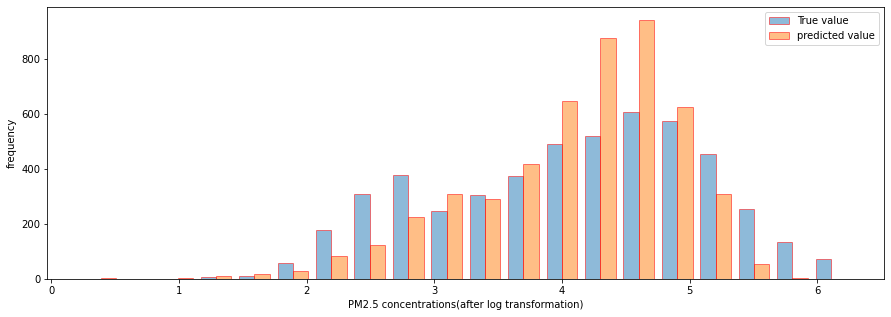

In [12]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_2_2_y['pm2.5'],lm.predict(test_data_task3_2_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [13]:
#Ridge regression
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
lr.score(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5']),lr.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])

(0.5574729225236306, 0.5424419046144983)

In [14]:
#Ridge with CV
from sklearn.linear_model import RidgeCV
alphas=np.logspace(-10,10,200)  
lr_cv=RidgeCV(alphas=alphas).fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])  
lr=Ridge(lr_cv.alpha_)
lr.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
lr.score(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5']),lr.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])

(0.5574728474676032, 0.5424541226673627)

Text(0, 0.5, 'frequency')

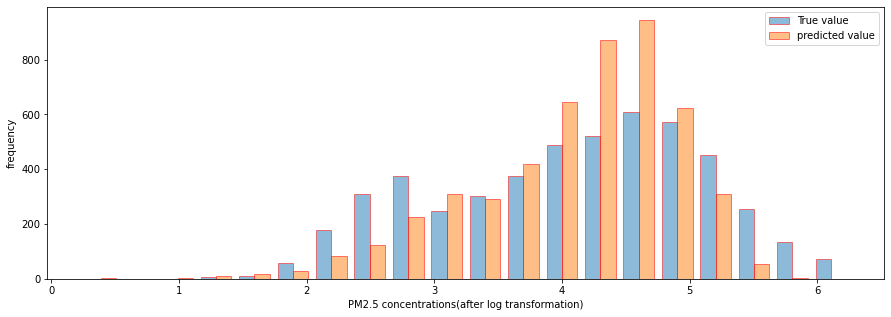

In [15]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_2_2_y['pm2.5'],lr.predict(test_data_task3_2_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [16]:
#LASSO regression
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
la.score(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5']),la.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])

(0.32455347835680026, 0.33777912151276)

In [17]:
#LASSO with CV
from sklearn.linear_model import LassoCV
alphas=np.logspace(-10,10,200)  
la_cv=LassoCV(alphas=alphas).fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])  
la=Lasso(la_cv.alpha_)
la.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
la.score(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5']),la.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])

(0.557430651311172, 0.5428594738413781)

Text(0, 0.5, 'frequency')

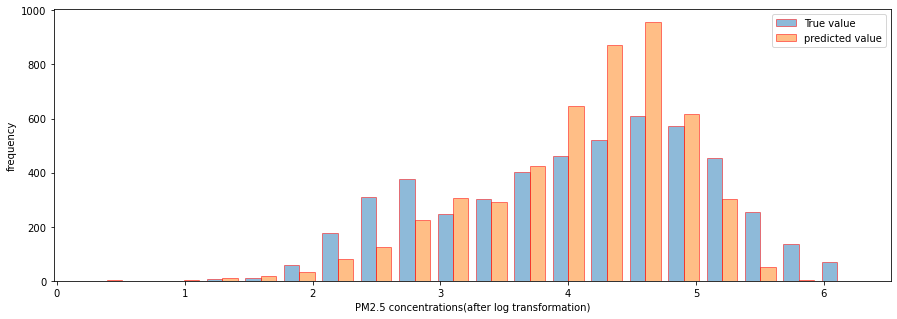

In [18]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_2_2_y['pm2.5'],la.predict(test_data_task3_2_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [19]:
from xgboost import XGBRegressor
from sklearn import preprocessing
from hyperopt import hp, fmin, rand, tpe, space_eval
lbl = preprocessing.LabelEncoder()
train_data_task3_2_2_X['cvornot'] = lbl.fit_transform(train_data_task3_2_2_X['cvornot'].astype(str))
train_data_task3_2_2_X['NEornot'] = lbl.fit_transform(train_data_task3_2_2_X['NEornot'].astype(str))
train_data_task3_2_2_X['NWornot'] = lbl.fit_transform(train_data_task3_2_2_X['NWornot'].astype(str))
train_data_task3_2_2_X['SEornot'] = lbl.fit_transform(train_data_task3_2_2_X['SEornot'].astype(str))
train_data_task3_2_2_X['nightornot'] = lbl.fit_transform(train_data_task3_2_2_X['nightornot'].astype(str))
train_data_task3_2_2_X['morningornot'] = lbl.fit_transform(train_data_task3_2_2_X['morningornot'].astype(str))
train_data_task3_2_2_X['afternoonornot'] = lbl.fit_transform(train_data_task3_2_2_X['afternoonornot'].astype(str))
train_data_task3_2_2_X['eveningornot'] = lbl.fit_transform(train_data_task3_2_2_X['eveningornot'].astype(str))
train_data_task3_2_2_X['weekdaysornot'] = lbl.fit_transform(train_data_task3_2_2_X['weekdaysornot'].astype(str))
train_data_task3_2_2_X['before_police_or_not'] = lbl.fit_transform(train_data_task3_2_2_X['before_police_or_not'].astype(str))
train_data_task3_2_2_X['month_class_one_or_not'] = lbl.fit_transform(train_data_task3_2_2_X['month_class_one_or_not'].astype(str))
train_data_task3_2_2_X['month_class_two_or_not'] = lbl.fit_transform(train_data_task3_2_2_X['month_class_two_or_not'].astype(str))
train_data_task3_2_2_X['month_class_three_or_not'] = lbl.fit_transform(train_data_task3_2_2_X['month_class_three_or_not'].astype(str))
train_data_task3_2_2_X['month_class_four_or_not'] = lbl.fit_transform(train_data_task3_2_2_X['month_class_four_or_not'].astype(str))
train_data_task3_2_2_X['month_class_five_or_not'] = lbl.fit_transform(train_data_task3_2_2_X['month_class_five_or_not'].astype(str))

test_data_task3_2_2_X['cvornot'] = lbl.fit_transform(test_data_task3_2_2_X['cvornot'].astype(str))
test_data_task3_2_2_X['NEornot'] = lbl.fit_transform(test_data_task3_2_2_X['NEornot'].astype(str))
test_data_task3_2_2_X['NWornot'] = lbl.fit_transform(test_data_task3_2_2_X['NWornot'].astype(str))
test_data_task3_2_2_X['SEornot'] = lbl.fit_transform(test_data_task3_2_2_X['SEornot'].astype(str))
test_data_task3_2_2_X['nightornot'] = lbl.fit_transform(test_data_task3_2_2_X['nightornot'].astype(str))
test_data_task3_2_2_X['morningornot'] = lbl.fit_transform(test_data_task3_2_2_X['morningornot'].astype(str))
test_data_task3_2_2_X['afternoonornot'] = lbl.fit_transform(test_data_task3_2_2_X['afternoonornot'].astype(str))
test_data_task3_2_2_X['eveningornot'] = lbl.fit_transform(test_data_task3_2_2_X['eveningornot'].astype(str))
test_data_task3_2_2_X['weekdaysornot'] = lbl.fit_transform(test_data_task3_2_2_X['weekdaysornot'].astype(str))
test_data_task3_2_2_X['before_police_or_not'] = lbl.fit_transform(test_data_task3_2_2_X['before_police_or_not'].astype(str))
test_data_task3_2_2_X['month_class_one_or_not'] = lbl.fit_transform(test_data_task3_2_2_X['month_class_one_or_not'].astype(str))
test_data_task3_2_2_X['month_class_two_or_not'] = lbl.fit_transform(test_data_task3_2_2_X['month_class_two_or_not'].astype(str))
test_data_task3_2_2_X['month_class_three_or_not'] = lbl.fit_transform(test_data_task3_2_2_X['month_class_three_or_not'].astype(str))
test_data_task3_2_2_X['month_class_four_or_not'] = lbl.fit_transform(test_data_task3_2_2_X['month_class_four_or_not'].astype(str))
test_data_task3_2_2_X['month_class_five_or_not'] = lbl.fit_transform(test_data_task3_2_2_X['month_class_five_or_not'].astype(str))

space = [hp.uniform('x', 300, 700), hp.uniform('y', 2, 4),hp.uniform('z',0.1,0.2)]
def q (args) :
    x, y,z= args
    xgb=XGBRegressor(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    xgb.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
    return -1*xgb.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

xgb=XGBRegressor(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
xgb.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
xgb.score(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5']),xgb.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])

100%|██████████| 100/100 [07:04<00:00,  4.24s/trial, best loss: -0.6457876544827008]


(0.7097736552107224, 0.6457876544827008)

Text(0, 0.5, 'frequency')

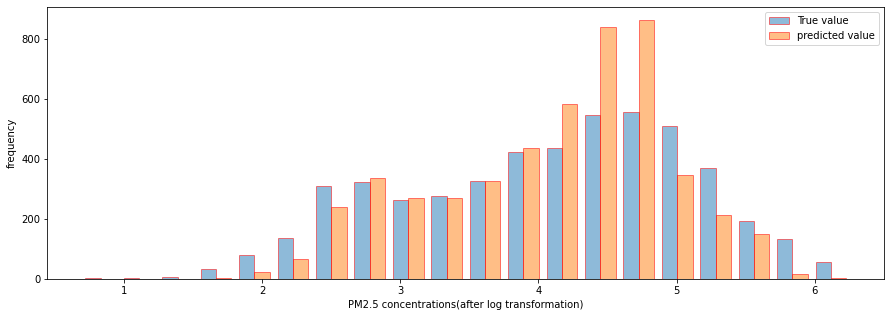

In [20]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_2_2_y['pm2.5'],xgb.predict(test_data_task3_2_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [21]:
#梯度boosting算法(含优化函数调参)
from hyperopt import hp, fmin, rand, tpe, space_eval
from sklearn.ensemble import GradientBoostingRegressor
space = [hp.uniform('x', 300, 700), hp.uniform('y', 2, 4),hp.uniform('z',0.1,0.2)]
def q (args) :
    x, y,z= args
    gbr=GradientBoostingRegressor(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    gbr.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
    return -1*gbr.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

gbr=GradientBoostingRegressor(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
gbr.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
gbr.score(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5']),gbr.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])

100%|██████████| 100/100 [20:07<00:00, 12.08s/trial, best loss: -0.6466237565258472]


(0.711054958627863, 0.6468152887446903)

Text(0, 0.5, 'frequency')

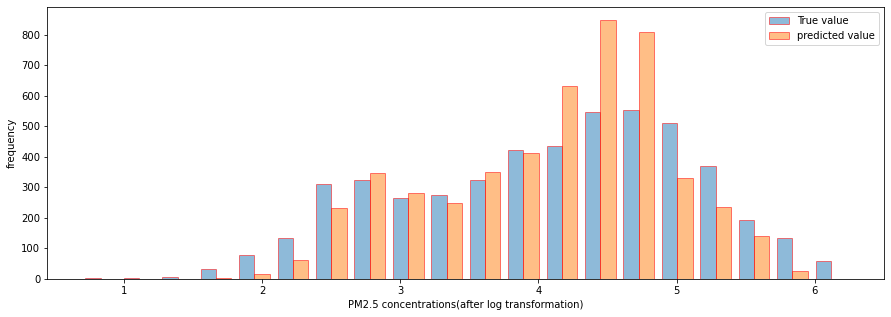

In [22]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_2_2_y['pm2.5'],gbr.predict(test_data_task3_2_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [23]:
#catboost
from catboost import CatBoostRegressor
score=pd.DataFrame(columns=['learning_rate','score'])
for i in range(-10,11):
    ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.03982+i*0.0001/20)
    ctr.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
    new=pd.DataFrame({'learning_rate':0.03982+i*0.0001/20,'score':ctr.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])},index=[1])
    score=score.append(new,ignore_index=True)

0:	learn: 0.9862175	total: 149ms	remaining: 3m 43s
1:	learn: 0.9712957	total: 154ms	remaining: 1m 55s
2:	learn: 0.9564184	total: 160ms	remaining: 1m 19s
3:	learn: 0.9427315	total: 164ms	remaining: 1m 1s
4:	learn: 0.9290110	total: 168ms	remaining: 50.3s
5:	learn: 0.9164902	total: 172ms	remaining: 42.9s
6:	learn: 0.9048112	total: 177ms	remaining: 37.7s
7:	learn: 0.8935158	total: 181ms	remaining: 33.7s
8:	learn: 0.8823291	total: 185ms	remaining: 30.6s
9:	learn: 0.8719021	total: 189ms	remaining: 28.1s
10:	learn: 0.8622925	total: 193ms	remaining: 26.1s
11:	learn: 0.8537274	total: 197ms	remaining: 24.4s
12:	learn: 0.8451811	total: 201ms	remaining: 22.9s
13:	learn: 0.8380150	total: 206ms	remaining: 21.8s
14:	learn: 0.8306538	total: 210ms	remaining: 20.7s
15:	learn: 0.8231612	total: 214ms	remaining: 19.8s
16:	learn: 0.8157934	total: 218ms	remaining: 19s
17:	learn: 0.8086957	total: 222ms	remaining: 18.3s
18:	learn: 0.8011070	total: 226ms	remaining: 17.6s
19:	learn: 0.7951052	total: 230ms	remain

In [24]:
score

,learning_rate,score
0,0.039770,0.652231
1,0.039775,0.653791
2,0.039780,0.653173
3,0.039785,0.653218
4,0.039790,0.652575
5,0.039795,0.652660
6,0.039800,0.653239
7,0.039805,0.652816
8,0.039810,0.652392
9,0.039815,0.654224


In [27]:
ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.039815)
ctr.fit(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5'])
ctr.score(train_data_task3_2_2_X,train_data_task3_2_2_y['pm2.5']),ctr.score(test_data_task3_2_2_X,test_data_task3_2_2_y['pm2.5'])

0:	learn: 0.9861998	total: 5.36ms	remaining: 8.04s
1:	learn: 0.9712622	total: 10.2ms	remaining: 7.66s
2:	learn: 0.9563701	total: 14.6ms	remaining: 7.29s
3:	learn: 0.9426705	total: 19.6ms	remaining: 7.33s
4:	learn: 0.9289381	total: 24.6ms	remaining: 7.35s
5:	learn: 0.9164074	total: 29.3ms	remaining: 7.29s
6:	learn: 0.9047200	total: 33.6ms	remaining: 7.16s
7:	learn: 0.8934171	total: 38.4ms	remaining: 7.15s
8:	learn: 0.8822231	total: 43.1ms	remaining: 7.13s
9:	learn: 0.8717902	total: 48.7ms	remaining: 7.26s
10:	learn: 0.8621489	total: 55.2ms	remaining: 7.47s
11:	learn: 0.8535763	total: 60.8ms	remaining: 7.53s
12:	learn: 0.8449958	total: 65.8ms	remaining: 7.53s
13:	learn: 0.8378372	total: 70.4ms	remaining: 7.48s
14:	learn: 0.8304018	total: 75.7ms	remaining: 7.49s
15:	learn: 0.8229191	total: 80.5ms	remaining: 7.46s
16:	learn: 0.8154283	total: 86.4ms	remaining: 7.54s
17:	learn: 0.8069627	total: 91.3ms	remaining: 7.51s
18:	learn: 0.8010206	total: 95.9ms	remaining: 7.47s
19:	learn: 0.7949653	t

(0.7425068974057469, 0.6542240774253631)

Text(0, 0.5, 'frequency')

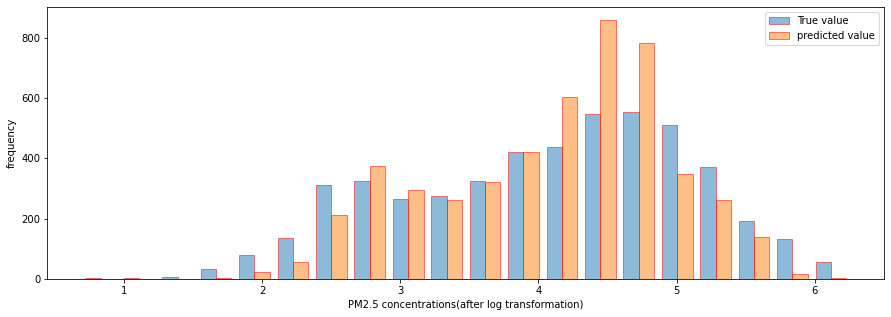

In [28]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task3_2_2_y['pm2.5'],ctr.predict(test_data_task3_2_2_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')